Fluid Flow Over a Plate
========================

This example demonstrates constructing a simulation of fluid flow near a plate using Tissue Forge built-in support for modeling and simulation with Dissipative Particle Dynamics (DPD). The simulation is constructed as a subdomain of a larger fluid flow over an infinite pipe, where a known fluid velocity just above the simulation domain is given. The fluid velocity above the simulation domain then acts as a stimulus for the fluid dynamics within the simulation domain. 

Basic Setup
------------

Begin by initializing a simulation for bulk fluid flow parallel to the ``xy`` plane, an infinite plate at the bottom of the domain, and known fluid velocity just above the domain.

In [1]:
import tissue_forge as tf

tf.init(dt=0.1, dim=[15, 12, 10],
        bc={'bottom': 'no_slip',
            'top': {'velocity': [-0.4, 0, 0]}})

Particle Types
---------------

Construct a single particle type that represents parcels of fluid material.

In [2]:
class AType(tf.ParticleTypeSpec):
    radius = 0.2
    style = {"color": "seagreen"}
    mass = 10


A = AType.get()

Fluid Interactions
-------------------

Construct fluid interactions for the following cases. 

1. Fluid particles in the domain interact according to DPD. 
2. Fluid particles interact uniformly with the fluid just above the top of the simulation domain according to DPD. 

In [3]:
dpd = tf.Potential.dpd(alpha=0.3, gamma=1, sigma=1, cutoff=0.6)
dpd_wall = tf.Potential.dpd(alpha=0.5, gamma=10, sigma=1, cutoff=0.1)

tf.bind.types(dpd, A, A)
tf.bind.boundary_condition(dpd_wall, tf.Universe.boundary_conditions.top, A)

0

Particle Construction
----------------------

In general, initializing fluid particles would mostly likely consist of randomly distributing them throughout a domain. However, initializing fluid particles in some subdomain of the space they will fill provides interesting early simulation interactions that resemble something like a fluid wave. 
Initialize fluid particles in a lattice at the center of the domain. 

In [4]:
uc = tf.lattice.sc(0.3, A)
parts = tf.lattice.create_lattice(uc, [25, 25, 25])

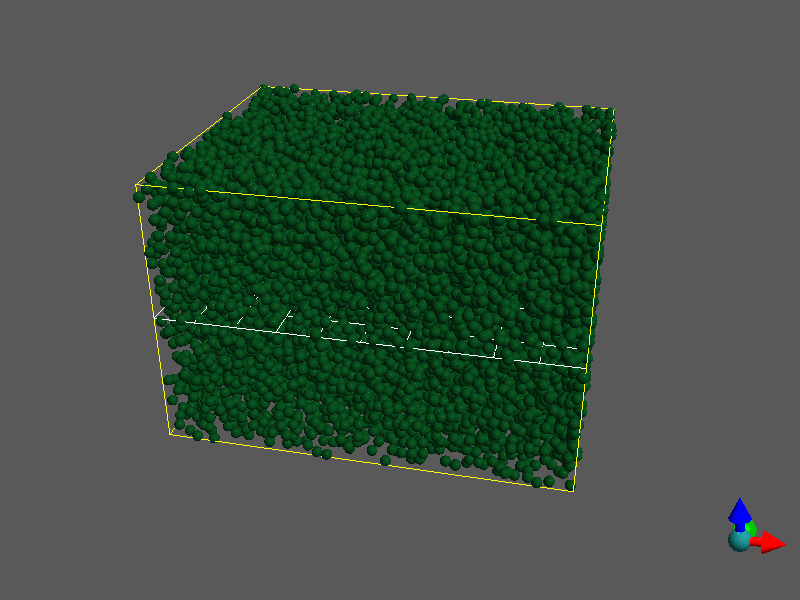

In [5]:
tf.show()